<a href="https://colab.research.google.com/github/ShoroukGamal/machine-learning-projects/blob/main/supervised/NN_salary_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('salary.csv', na_values=' ?')

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df.duplicated().sum()

24

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(32537, 15)

In [ ]:
df["workclass"].value_counts()

,count
workclass,
Private,22673
Self-emp-not-inc,2540
Local-gov,2093
State-gov,1298
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


In [ ]:
df["education"].value_counts()

,count
education,
HS-grad,10494
Some-college,7282
Bachelors,5353
Masters,1722
Assoc-voc,1382
11th,1175
Assoc-acdm,1067
10th,933
7th-8th,645


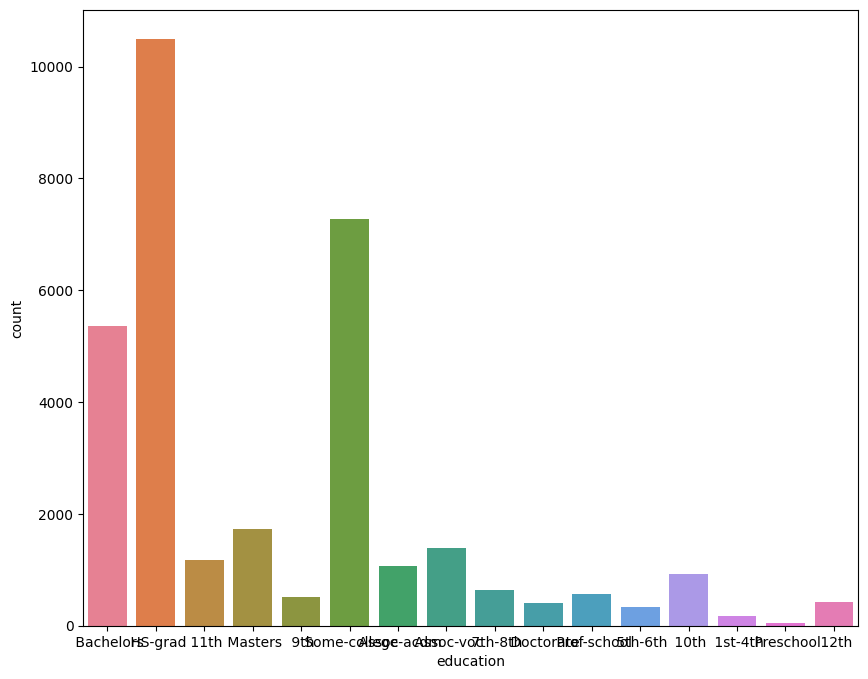

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x= "education", hue= "education", data=df)
plt.show()

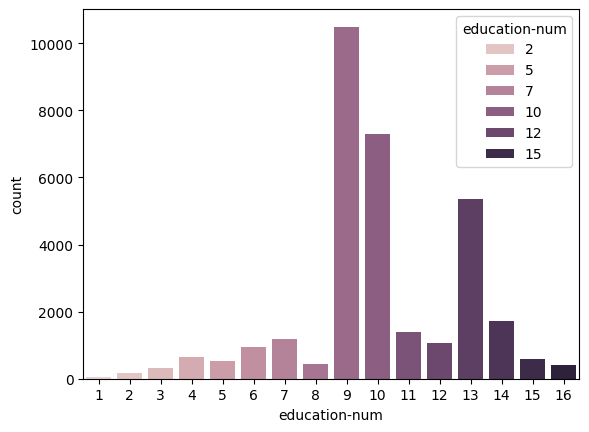

In [ ]:
sns.countplot(x= "education-num", hue= "education-num", data=df)
plt.show()

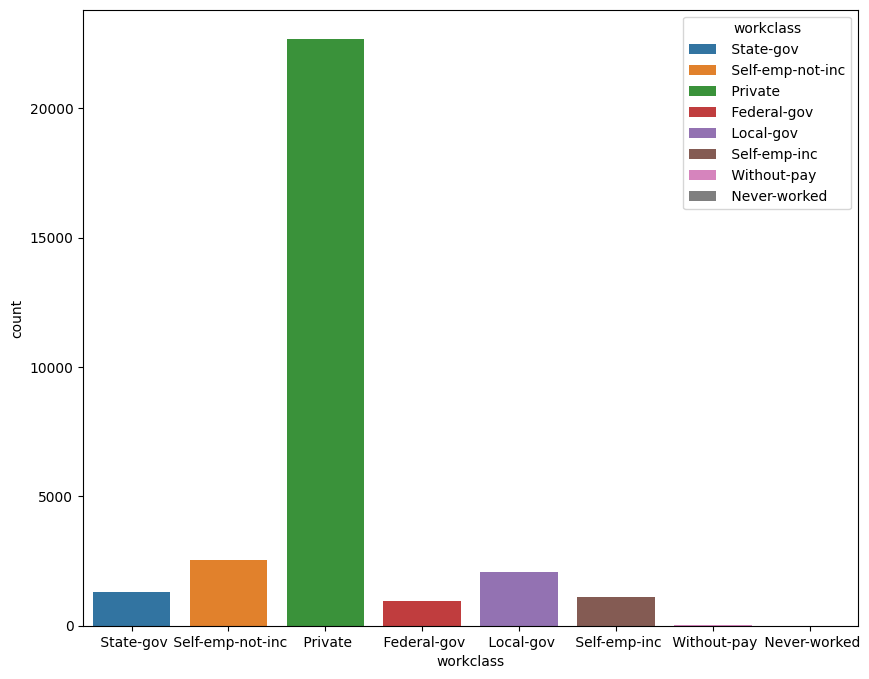

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x= "workclass", hue= "workclass", data=df)
plt.show()

In [ ]:
df["workclass"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [ ]:
df["capital-gain"].value_counts()

,count
capital-gain,
0,29825
15024,347
7688,284
7298,246
99999,159
...,...
1111,1
2538,1
22040,1


In [ ]:
df["capital-loss"].value_counts()

,count
capital-loss,
0,31018
1902,202
1977,168
1887,159
1848,51
...,...
2080,1
1539,1
1844,1


In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
occupation,1843
workclass,1836
native-country,582
age,0
fnlwgt,0
education,0
education-num,0
marital-status,0
relationship,0
race,0


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values= np.nan ,strategy='most_frequent')
for col in ['workclass', 'occupation', 'native-country']:
    df[col] = imputer.fit_transform(np.array(df[col]).reshape(-1,1)).ravel()

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


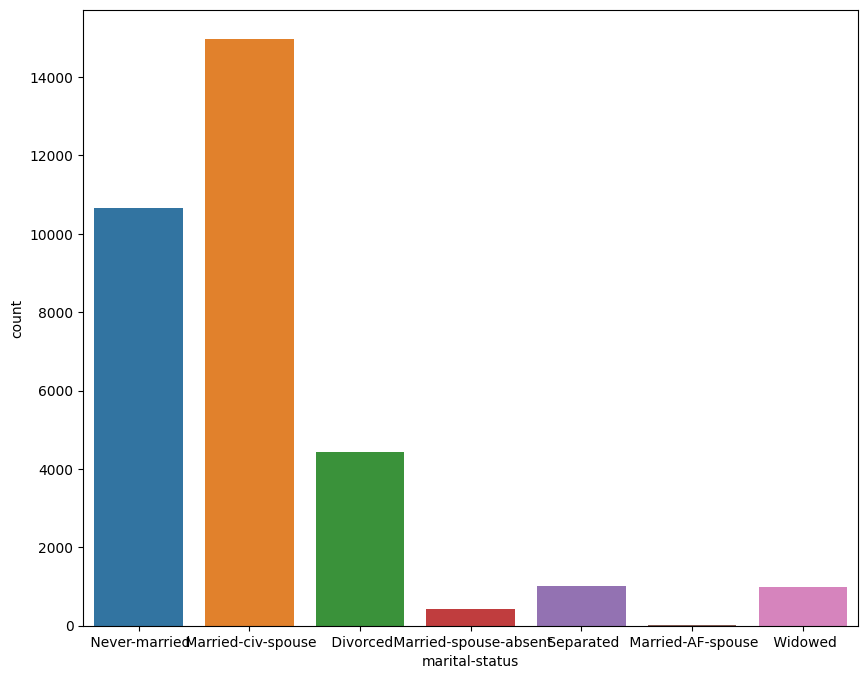

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x= "marital-status", hue= "marital-status", data=df)
plt.show()

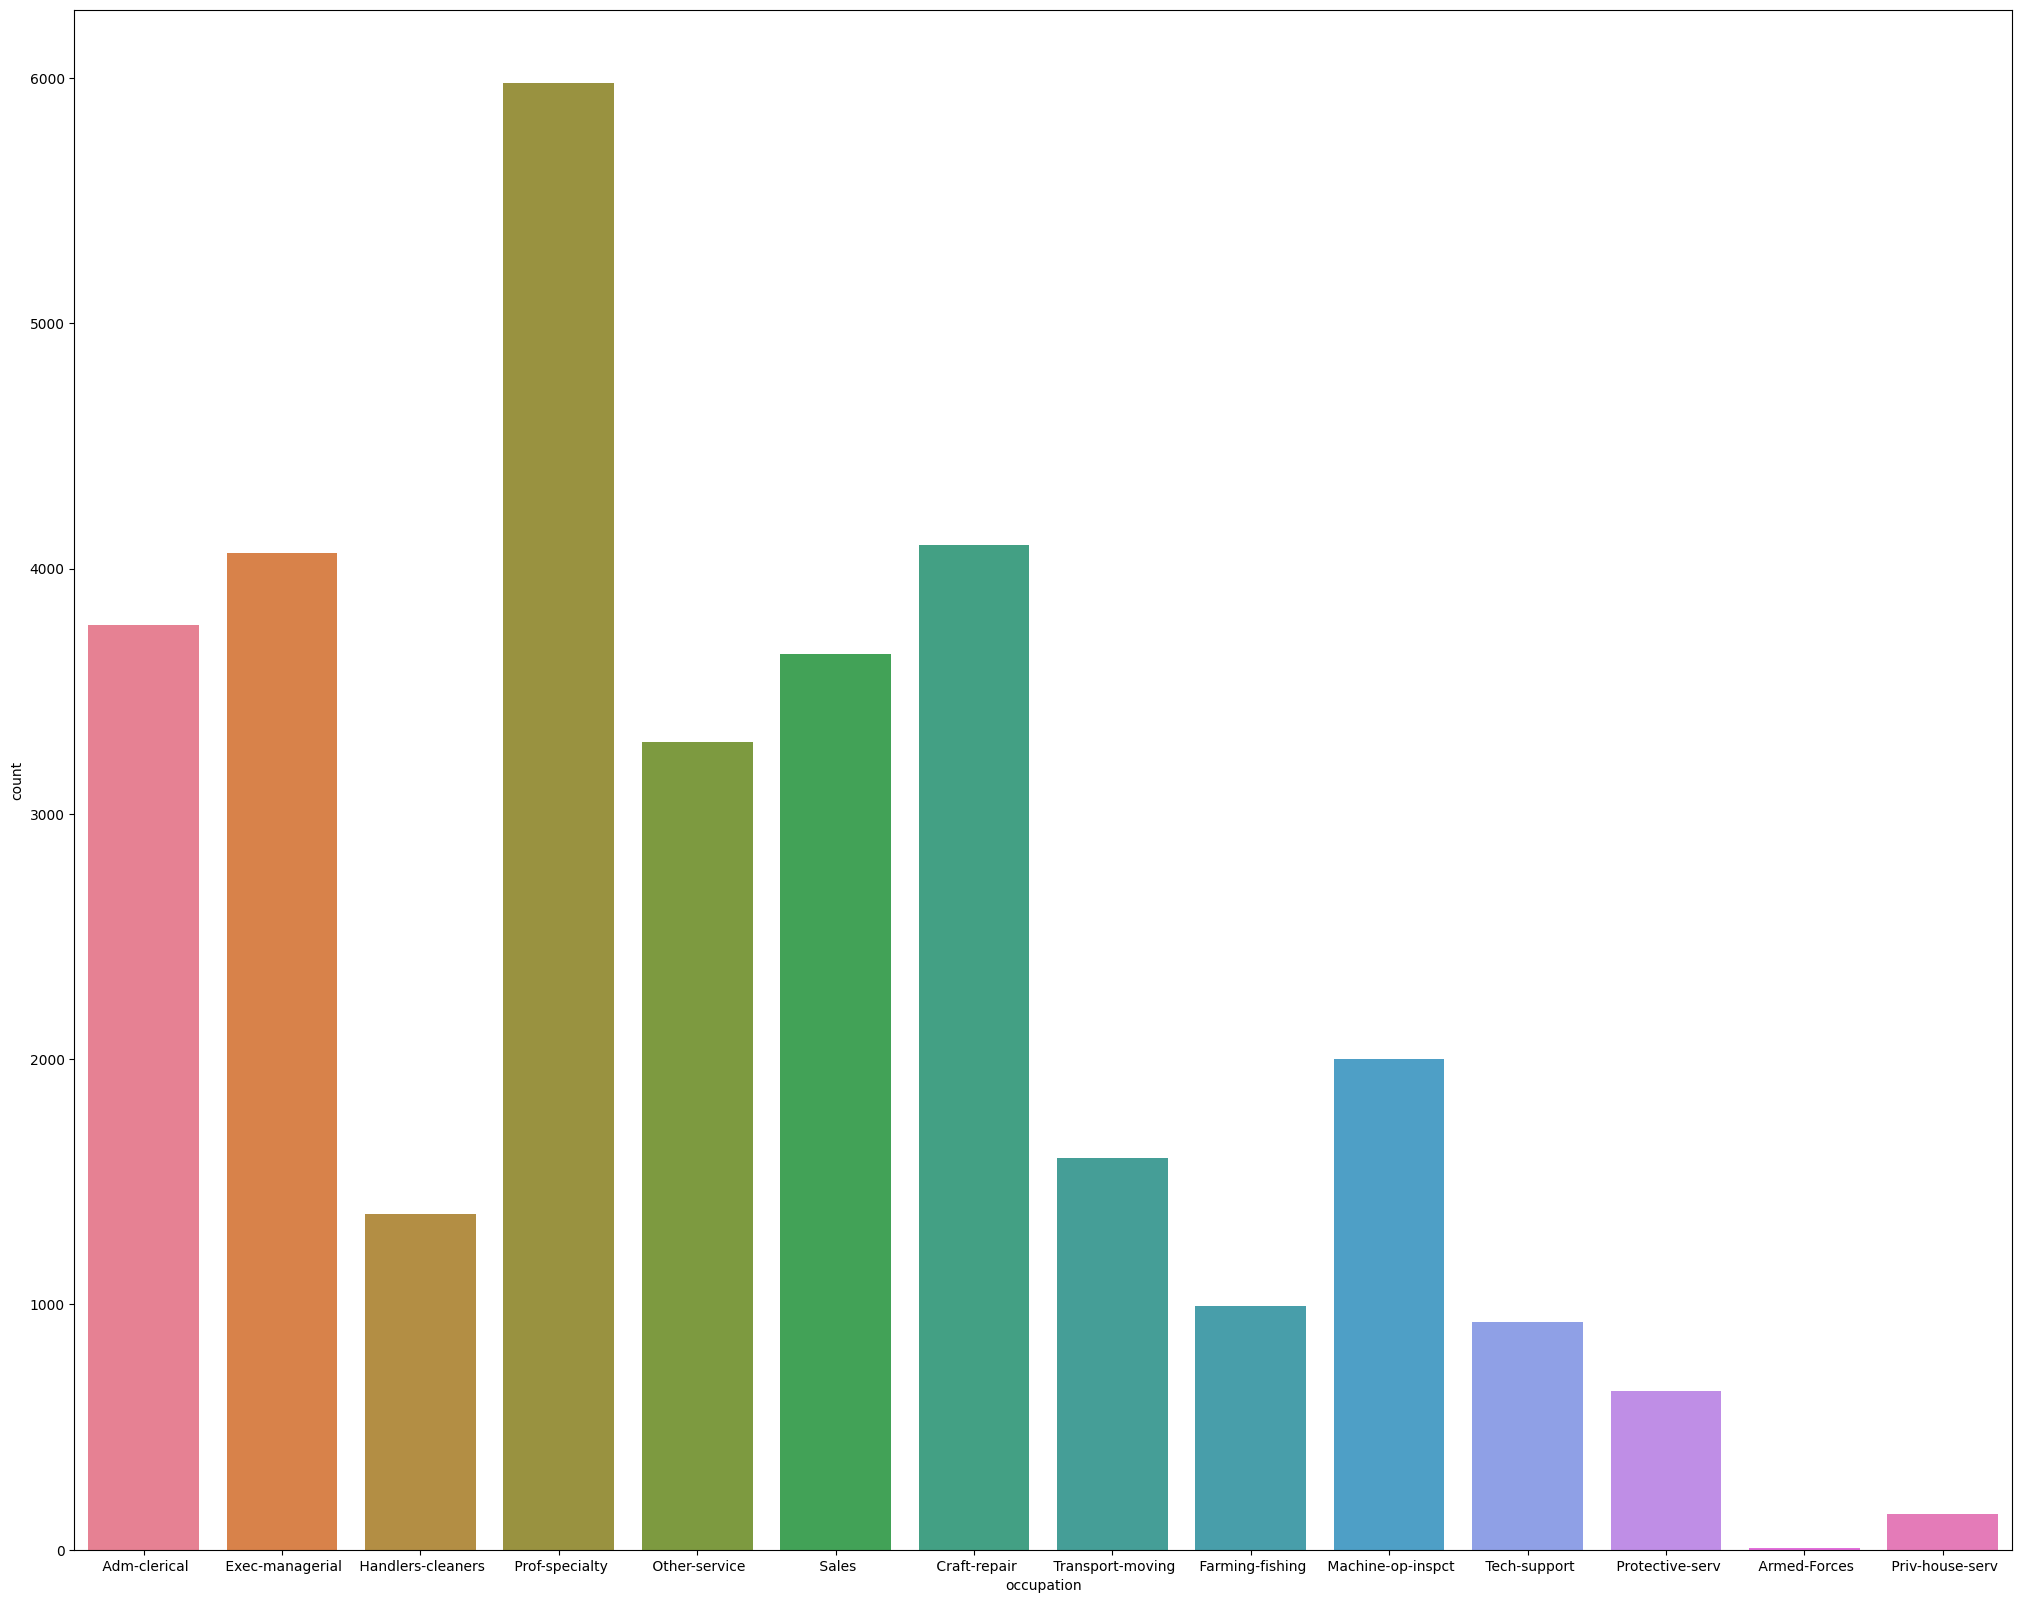

In [ ]:
plt.figure(figsize=(25,20))
sns.countplot(x= "occupation", hue= "occupation", data=df)
plt.show()

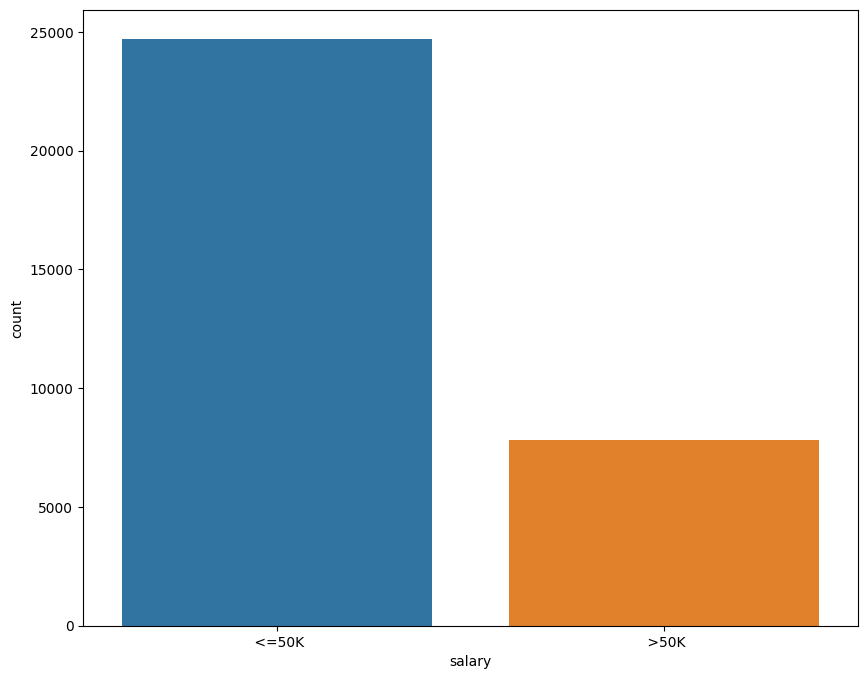

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x= "salary", hue= "salary", data=df)
plt.show()

In [ ]:
df_new = df.drop(["capital-gain", "capital-loss", "education"], axis=1)
df_new.shape

(32537, 12)

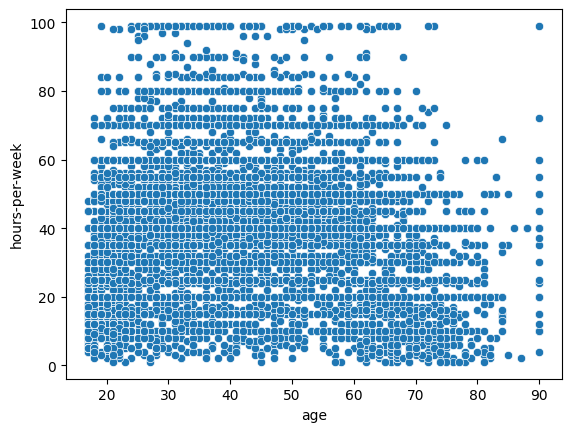

In [ ]:
sns.scatterplot(x= "age", y= "hours-per-week", data=df_new)
plt.show()

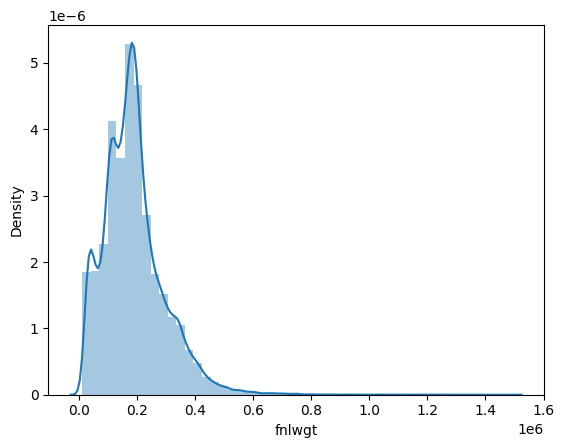

In [ ]:
sns.distplot(df_new["fnlwgt"])
plt.show()

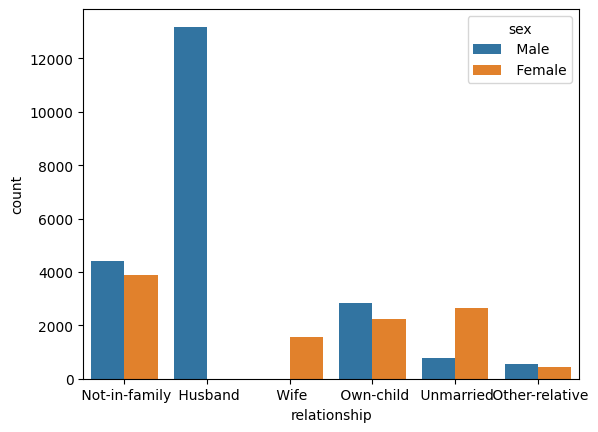

In [ ]:
sns.countplot(x= "relationship", hue="sex" ,data=df_new)
plt.show()

In [ ]:
df_new.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


In [ ]:
df_new["marital-status"].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [ ]:
df_new["relationship"].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [ ]:
df_new = df_new.drop(["relationship"], axis=1)

In [ ]:
df_new["native-country"].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [ ]:
df["salary"].unique()

array([' <=50K', ' >50K'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ["workclass","marital-status", "occupation", "race", "sex", "native-country", "salary"]:
    df_new[col] = le.fit_transform(df_new[col])

In [ ]:
df_new["salary"].unique()

array([0, 1])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
for col in ["age", "fnlwgt", "hours-per-week"]:
    df_new[col] = scaler.fit_transform(np.array(df_new[col]).reshape(-1,1))

In [ ]:
x = df_new.drop(["salary"], axis=1)
y = df_new["salary"]

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((26029, 10), (6508, 10), (26029,), (6508,))

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(512, activation='relu', input_shape=x.shape[1:]))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(28, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │           5,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 28)                  │           1,820 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              29 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 97,913 (382.47 KB)

 Trainable params: 97,913 (382.47 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'precision', 'recall'])

history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_split=0.1)

Epoch 1/100
367/367 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7675 - loss: 0.4996 - precision: 0.5060 - recall: 0.1878 - val_accuracy: 0.7975 - val_loss: 0.4117 - val_precision: 0.5737 - val_recall: 0.4850
Epoch 2/100
367/367 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7978 - loss: 0.4187 - precision: 0.6251 - recall: 0.4137 - val_accuracy: 0.8248 - val_loss: 0.3674 - val_precision: 0.6698 - val_recall: 0.4784
Epoch 3/100
367/367 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8105 - loss: 0.4013 - precision: 0.6523 - recall: 0.4490 - val_accuracy: 0.8294 - val_loss: 0.3671 - val_precision: 0.7047 - val_recall: 0.4518
Epoch 4/100
367/367 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8186 - loss: 0.3865 - precision: 0.6645 - recall: 0.4880 - val_accuracy: 0.8275 - val_loss: 0.3625 - val_precision: 0.7270 - val_recall: 0.4070
Epoch 5/100
367/367 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8115 - loss: 0.3926 - precision: 0.6566 - recall: 0.4669 - val_accuracy: 0.8037 - val_los

In [ ]:
model_evalute = model.evaluate(x_test, y_test)
print('accuracy', model_evalute)

204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8312 - loss: 0.3788 - precision: 0.6704 - recall: 0.6191
accuracy [0.38601619005203247, 0.8297479748725891, 0.6640158891677856, 0.6250779628753662]


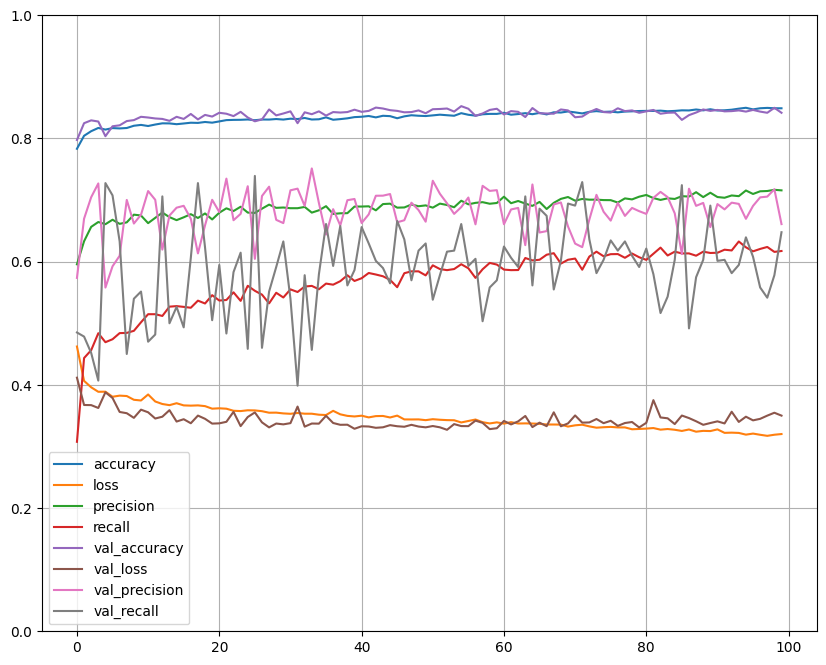

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()